# Cardiac Arrhythmia Multi-Class Classification


### Libraries and Basic Infos of Dataset 

In [2]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('arrhythmia_csv.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(125), int64(155)
memory usage: 988.9 KB


In [5]:
data.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [6]:
data.tail()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [7]:
data.describe()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


## Data Preprocessing

In [8]:
data[(data.astype(str) == '?')] = np.nan

In [9]:
# Columns with missing data( '?')
null_columns=data.columns[data.isnull().any()] 
data[null_columns].isnull().sum()
null_columns

Index(['T', 'P', 'QRST', 'J', 'heartrate'], dtype='object')

In [10]:
data= data.fillna( method='ffill') 
data= data.fillna( method='bfill')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(125), int64(155)
memory usage: 988.9 KB


In [11]:
# Missing value double-check
null_columns=data.columns[data.isnull().any()] 
data[null_columns].isnull().sum()
null_columns

Index([], dtype='object')

In [12]:
X = data.loc[:, 'age':'chV6_QRSTA']
y= data['class']

In [13]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Part I: GridSeachCV, Bagging, Boosting, Voting Classifier
#### Evaluation strategy is GridSearchCV because it is fundamental to choose the best parameters.
## 1) GridSearchCV & Hard Voting ( Pure Estimators)
### K Nearest Neighbors (K=5)

In [14]:
param = {'n_neighbors':[1,3,5,7,15,55]} #create dict of parameters

grid_search_knn = GridSearchCV(KNeighborsClassifier(),param, cv=2) # each parameter has a cv of 2 folds.
grid_search_knn.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_knn.best_params_)) 
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_)) 
print("Best estimator:\n{}".format(grid_search_knn.best_estimator_))

results = pd.DataFrame(grid_search_knn.cv_results_)
scores = np.array(results.mean_test_score)
train_score = grid_search_knn.score(X_train,y_train)
test_score = grid_search_knn.score(X_test,y_test)
print('KNN score( training): {:.6f}'
     .format(train_score))
print('KNN score (testing): {:.6f}'
     .format(test_score))

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.57
Best estimator:
KNeighborsClassifier(n_neighbors=3)
KNN score( training): 0.660767
KNN score (testing): 0.601770


### Logistic Regression (penalty='l2')

In [15]:
paramlog = {'penalty':['l2']} #create dict of parameters

grid_search_log = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000),paramlog, cv=2) # each parameter has a cv of 2 folds.
grid_search_log.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_log.best_params_)) 
print("Best cross-validation score: {:.2f}".format(grid_search_log.best_score_)) 
print("Best estimator:\n{}".format(grid_search_log.best_estimator_))

results = pd.DataFrame(grid_search_log.cv_results_)
scores = np.array(results.mean_test_score)
train_score = grid_search_log.score(X_train,y_train)
test_score = grid_search_log.score(X_test,y_test)
print('LogReg score( training): {:.6f}'
     .format(train_score))
print('LogReg score (testing): {:.6f}'
     .format(test_score))

Best parameters: {'penalty': 'l2'}
Best cross-validation score: 0.64
Best estimator:
LogisticRegression(max_iter=1000)
LogReg score( training): 0.855457
LogReg score (testing): 0.672566


### Linear SVC
#### Best Estimator without Ensemble Method

In [16]:
paramC = {'C':[0.01,0.1,1,10,100]} #create dict of parameters

grid_search_svc = GridSearchCV(LinearSVC(),paramC, cv=2) # each parameter has a cv of 10 folds.
grid_search_svc.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_svc.best_params_)) 
print("Best cross-validation score: {:.2f}".format(grid_search_svc.best_score_)) 
print("Best estimator:\n{}".format(grid_search_svc.best_estimator_))

results = pd.DataFrame(grid_search_svc.cv_results_)
scores = np.array(results.mean_test_score)
train_score = grid_search_svc.score(X_train,y_train)
test_score = grid_search_svc.score(X_test,y_test)
print('Linear svc score( training): {:.6f}'
     .format(train_score))
print('Linear svc score (testing): {:.6f}'
     .format(test_score))

c:\users\prassantha\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\prassantha\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\prassantha\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\prassantha\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\prassantha\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of

Best parameters: {'C': 1}
Best cross-validation score: 0.67
Best estimator:
LinearSVC(C=1)
Linear svc score( training): 0.949853
Linear svc score (testing): 0.663717


c:\users\prassantha\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Kernel SVC

In [17]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]} #create dict of parameters

grid_search_rbf = GridSearchCV(SVC(kernel = 'rbf'),param_grid, cv=2) # each parameter has a cv of 2 folds.
grid_search_rbf.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_rbf.best_params_)) 
print("Best cross-validation score: {:.2f}".format(grid_search_rbf.best_score_)) 
print("Best estimator:\n{}".format(grid_search_rbf.best_estimator_))

results = pd.DataFrame(grid_search_rbf.cv_results_)
scores = np.array(results.mean_test_score)
train_score = grid_search_rbf.score(X_train,y_train)
test_score = grid_search_rbf.score(X_test,y_test)
print('rbf score( training): {:.6f}'
     .format(train_score))
print('rbf score (testing): {:.6f}'
     .format(test_score))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.65
Best estimator:
SVC(C=10, gamma=0.1)
rbf score( training): 0.985251
rbf score (testing): 0.672566


### Desicion Tree

In [18]:
depth = {'max_depth':[8,58,108,138,158,208,258,279]} #create dict of parameters
grid_search_dtc = GridSearchCV(dtc(),depth, cv=2) # each parameter has a cv of 2 folds.
grid_search_dtc.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_dtc.best_params_)) 
print("Best cross-validation score: {:.2f}".format(grid_search_dtc.best_score_)) 
print("Best estimator:\n{}".format(grid_search_dtc.best_estimator_))

results = pd.DataFrame(grid_search_dtc.cv_results_)
scores = np.array(results.mean_test_score)
train_score = grid_search_dtc.score(X_train,y_train)
test_score = grid_search_dtc.score(X_test,y_test)
print('Decision Tree score( training): {:.6f}'
     .format(train_score))
print('Decision Tree score (testing): {:.6f}'
     .format(test_score))

Best parameters: {'max_depth': 8}
Best cross-validation score: 0.67
Best estimator:
DecisionTreeClassifier(max_depth=8)
Decision Tree score( training): 0.938053
Decision Tree score (testing): 0.601770


### Random Forest

In [19]:
maxfeat = {'max_features':[8,10,50,75,105,235,255,275,279]} #create dict of parameters

grid_search_rfc = GridSearchCV(rfc(),maxfeat, cv=2) # each parameter has a cv of 10 folds.
grid_search_rfc.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_rfc.best_params_)) 
print("Best cross-validation score: {:.2f}".format(grid_search_rfc.best_score_)) 
print("Best estimator:\n{}".format(grid_search_rfc.best_estimator_))

results = pd.DataFrame(grid_search_rfc.cv_results_)
scores = np.array(results.mean_test_score)
train_score = grid_search_rfc.score(X_train,y_train)
test_score = grid_search_rfc.score(X_test,y_test)
print('Random Forest score( training): {:.6f}'
     .format(train_score))
print('Random Forest score (testing): {:.6f}'
     .format(test_score))

Best parameters: {'max_features': 50}
Best cross-validation score: 0.72
Best estimator:
RandomForestClassifier(max_features=50)
Random Forest score( training): 1.000000
Random Forest score (testing): 0.761062


### Hard Voting

In this section, 6 Estimators are used for final hard voting.

Soft voting is not included since probability option is unavailable in Linear SVC. Also, It takes too long to calculate in Kernelized SVC.

Best parameters chosen for each estimator:

KNN Classifier: k=5
Logistic Regressor: penalty='l2'
Linear SVC: C=0.1
Kernelized SVC: C=100, gamma =0.01
Decision Tree Classifier: Max_depth=8
Random Forest Classifier: Max_features= 279 ( may change due to PCA reduction)

In [20]:
knn_clf= KNeighborsClassifier(n_neighbors = 5)
log_clf = LogisticRegression(penalty='l2',random_state=10)
svm_clf = LinearSVC(C=0.1,random_state=10)
rbf_clf= SVC(kernel = 'rbf', C =100, gamma =0.01, random_state=10)
dtc_clf= dtc(max_depth=8, random_state=10)
rfc_clf = rfc(max_features= 279, random_state=10)

voting_clf = VotingClassifier(estimators=[('knn',knn_clf),('lr', log_clf), ('svc', svm_clf),
                                          ('rbf',rbf_clf),('dtc',dtc_clf),('rfc', rfc_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
print('Train score: {0:0.6f}'.format(voting_clf.score(X_train,y_train)))
print('Test score: {0:0.6f}'.format(voting_clf.score(X_test,y_test)))

c:\users\prassantha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score: 0.882006
Test score: 0.699115


# 2) Bagging Ensemble (excluding KNN)
#### Because of the nature of K-nearest neighbor classifier, the sample weight is not supported for Bagging Ensemble.

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

### Logistic Regression

In [22]:
bag_log= BaggingClassifier(LogisticRegression(penalty='l2'), 
                           n_estimators=500, max_samples=100, bootstrap=True,oob_score=True, n_jobs=-1, random_state=10)
bag_log.fit(X,y)
print('Train score: {0:0.6f}'.format(bag_log.score(X,y)))
print('Out of bag score: {0:0.6f}'.format(bag_log.oob_score_))

Train score: 0.769912
Out of bag score: 0.683628


### Linear SVC

In [23]:
bag_svc= BaggingClassifier(LinearSVC(C=0.1, random_state=10), 
                           n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=10,oob_score=True)
bag_svc.fit(X, y)
print('Train score: {0:0.6f}'.format(bag_svc.score(X,y)))
print('Out of bag score: {0:0.6f}'.format(bag_svc.oob_score_)) # Best one so far

Train score: 0.661504
Out of bag score: 0.612832


### Kernelized SVC

In [24]:
bag_rbf=BaggingClassifier(SVC(kernel = 'rbf', C =100, gamma =0.01, random_state=10), 
                           n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=10,oob_score=True)
bag_rbf.fit(X, y)
print('Train score: {0:0.6f}'.format(bag_rbf.score(X,y)))
print('Out of bag score: {0:0.6f}'.format(bag_rbf.oob_score_))

Train score: 0.542035
Out of bag score: 0.542035


### Desicion Tree

In [25]:
bag_dtc = BaggingClassifier(dtc(max_depth=8, random_state=10), 
                            n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=10,oob_score=True)
bag_dtc.fit(X, y)
print('Train score: {0:0.6f}'.format(bag_dtc.score(X,y)))
print('Out of bag score: {0:0.6f}'.format(bag_dtc.oob_score_))

Train score: 0.825221
Out of bag score: 0.725664


### Random Forest

In [26]:
bag_random_forest = BaggingClassifier(rfc(max_features= 279, random_state=10), 
                           n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=10,oob_score=True)
bag_random_forest.fit(X, y)
print('Train score: {0:0.6f}'.format(bag_random_forest.score(X,y)))
print('Out of bag score: {0:0.6f}'.format(bag_random_forest.oob_score_))

Train score: 0.787611
Out of bag score: 0.674779


### Bagging Ensemble : Hard Voting

In [27]:
voting_bag_clf = VotingClassifier(estimators=[('lr',bag_log), ('svc',bag_svc),
                                          ('rbf',bag_rbf),('dtc',bag_dtc),('rfc', bag_random_forest)], voting='hard')
voting_bag_clf.fit(X_train, y_train)
print('Train score: {0:0.6f}'.format(voting_bag_clf.score(X_train,y_train)))
print('Test score: {0:0.6f}'.format(voting_bag_clf.score(X_test,y_test)))

Train score: 0.705015
Test score: 0.601770


# 3) Boosting Ensemble (Excluding KNN)

In [28]:
from sklearn.ensemble import AdaBoostClassifier

### Logistic Regression

In [29]:
ada_log = AdaBoostClassifier(
    LogisticRegression(penalty='l2'), n_estimators=500,
    algorithm="SAMME.R", learning_rate=0.5, random_state=10)
ada_log.fit(X_train, y_train)
print('Train score: {0:0.6f}'.format(ada_log.score(X_train,y_train)))
print('Test score: {0:0.6f}'.format(ada_log.score(X_test,y_test)))

Train score: 0.775811
Test score: 0.628319


### Linear SVC

In [30]:
ada_svc = AdaBoostClassifier(
    LinearSVC(C=0.1), n_estimators=500,
    algorithm="SAMME", learning_rate=0.5, random_state=10)
ada_svc.fit(X_train, y_train)
print('Train score: {0:0.6f}'.format(ada_svc.score(X_train,y_train)))
print('Test score: {0:0.6f}'.format(ada_svc.score(X_test,y_test)))

Train score: 0.758112
Test score: 0.575221


### Kernelized SVC

In [31]:
ada_rbf = AdaBoostClassifier(
    SVC(kernel = 'rbf', C =100, gamma =0.01, random_state=10), n_estimators=500,
    algorithm="SAMME", learning_rate=0.5, random_state=10)
ada_rbf.fit(X_train, y_train)
print('Train score: {0:0.6f}'.format(ada_rbf.score(X_train,y_train)))
print('Test score: {0:0.6f}'.format(ada_rbf.score(X_test,y_test)))

Train score: 0.548673
Test score: 0.557522


### Desicion Tree

In [32]:
ada_dtc = AdaBoostClassifier(
    dtc(max_depth=8), n_estimators=500,
    algorithm="SAMME.R", learning_rate=0.5, random_state=10)
ada_dtc.fit(X_train, y_train)
print('Train score: {0:0.6f}'.format(ada_dtc.score(X_train,y_train)))
print('Test score: {0:0.6f}'.format(ada_dtc.score(X_test,y_test)))

Train score: 1.000000
Test score: 0.646018


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(learning_rate = 0.05)
gb_clf.fit(X_train,y_train)
print('Train score: {0:0.6f}'.format(gb_clf.score(X_train,y_train)))
print('Test score: {0:0.6f}'.format(gb_clf.score(X_test,y_test)))
print('Feature Importance:'.format(gb_clf.feature_importances_))

Train score: 1.000000
Test score: 0.699115
Feature Importance:


### Random Forest

In [34]:
ada_rfc = AdaBoostClassifier(
    rfc(max_features= 279, random_state=10), n_estimators=500,
    algorithm="SAMME.R", learning_rate=0.5, random_state=10)
ada_rfc.fit(X_train, y_train)
print('Train score: {0:0.6f}'.format(ada_rfc.score(X_train,y_train)))
print('Test score: {0:0.6f}'.format(ada_rfc.score(X_test,y_test)))

Train score: 1.000000
Test score: 0.734513


### Adaboost Ensemble : Hard voting

In [35]:
voting_ada_clf = VotingClassifier(estimators=[('lr',ada_log), ('svc',ada_svc),
                                          ('rbf',ada_rbf),('dtc',ada_dtc),('rfc', ada_rfc)], voting='hard')
voting_ada_clf.fit(X_train, y_train)
print('Train score: {0:0.6f}'.format(voting_ada_clf.score(X_train,y_train)))
print('Test score: {0:0.6f}'.format(voting_ada_clf.score(X_test,y_test)))

Train score: 0.876106
Test score: 0.610619


# Part III: Evaluation Strategy ( Recall and Micro-average)
The purpose of this section is to recommend treatment to people who really have symptoms of Cardiac Arrhythmia. In another word, we do not want to miss people that are predicted to be normal yet actually have symptoms. Therefore, in this situation, I propose using Recall as the classification metric and Micro-Average to address imbalanced data.

In this section, I have plotted out pie chart to prove an imbalanced data, where the majority part is normal cases for Cardiac Arrhythmia. Then a binary code is assigned to normal case as 1 versus 0 to the rest as having symptoms. From there I preprocess binary imbalanced data with the same parameters. All the estimators( with the best chosen parameters) will then train and test new data to boil down to confusion matrix and a classification report.

([<matplotlib.patches.Wedge at 0x2388c880400>,
 [Text(-1.09042229229435, -0.1448420673269172, '1'),
  Text(0.5935350356561759, -0.9261296677294287, '2'),
  Text(0.9135533156683283, -0.6127155452829672, '3'),
  Text(1.0206008784728229, -0.41033382368567, '4'),
  Text(1.0806875196636352, -0.20521813965451588, '5'),
  Text(1.0967866373728783, 0.08401828420227701, '6'),
  Text(1.059834420956483, 0.29453522735971144, '7'),
  Text(1.0489608320982315, 0.3311814800434737, '8'),
  Text(1.020600852060291, 0.4103338893801101, '9'),
  Text(0.7723925181199653, 0.7832048250312935, '10'),
  Text(0.4315238958035531, 1.0118236641581992, '14'),
  Text(0.3674277166530434, 1.0368205597089262, '15'),
  Text(0.16754556623448402, 1.087165343098816, '16')],
 [Text(-0.5947757957969182, -0.07900476399650028, '54.2%'),
  Text(0.32374638308518683, -0.5051616369433247, '9.7%'),
  Text(0.49830180854636086, -0.3342084792452548, '3.3%'),
  Text(0.5566913882579033, -0.22381844928309272, '3.3%'),
  Text(0.5894659198165

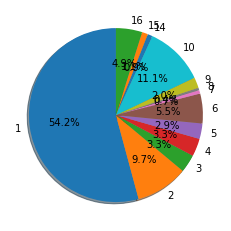

In [36]:
unique, counts = np.unique(y, return_counts=True) 
plt.pie(counts, labels = unique, autopct='%1.1f%%', shadow=True, startangle=90)

In [37]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:17])
print('New binary labels:\t', y_binary_imbalanced[1:17])

Original labels:	 1      6
2     10
3      1
4      7
5     14
6      1
7      1
8      1
9     10
10     3
11     1
12    10
13     6
14     1
15     1
16    10
Name: class, dtype: int64
New binary labels:	 1     0
2     0
3     1
4     0
5     0
6     1
7     1
8     1
9     0
10    0
11    1
12    0
13    0
14    1
15    1
16    0
Name: class, dtype: int64


In [38]:
np.bincount(y_binary_imbalanced) # class 1 is the most frequent 245 observations where status is normal

array([207, 245], dtype=int64)

In [39]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced, random_state = 10)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## K-Nearest Neighbor

In [40]:
knn_clf = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
y_predicted= knn_clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
print('confusion regression classifier \n', confusion)
print(classification_report(y_test, y_predicted, target_names=['not 1', '1']))

confusion regression classifier 
 [[13 37]
 [ 4 59]]
              precision    recall  f1-score   support

       not 1       0.76      0.26      0.39        50
           1       0.61      0.94      0.74        63

    accuracy                           0.64       113
   macro avg       0.69      0.60      0.57       113
weighted avg       0.68      0.64      0.59       113



## Logistic Regression

In [44]:
log_clf = LogisticRegression(penalty='l2',random_state=10).fit(X_train,y_train)
y_predicted= log_clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
print('confusion regression classifier \n', confusion)
print(classification_report(y_test, y_predicted, target_names=['not 1', '1']))

confusion regression classifier 
 [[32 18]
 [15 48]]
              precision    recall  f1-score   support

       not 1       0.68      0.64      0.66        50
           1       0.73      0.76      0.74        63

    accuracy                           0.71       113
   macro avg       0.70      0.70      0.70       113
weighted avg       0.71      0.71      0.71       113



c:\users\prassantha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Linear SVC

In [45]:
svm_clf = LinearSVC(C=0.1,random_state=10).fit(X_train,y_train)
y_predicted= svm_clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
print('confusion regression classifier \n', confusion)
print(classification_report(y_test, y_predicted, target_names=['not 1', '1']))

confusion regression classifier 
 [[32 18]
 [15 48]]
              precision    recall  f1-score   support

       not 1       0.68      0.64      0.66        50
           1       0.73      0.76      0.74        63

    accuracy                           0.71       113
   macro avg       0.70      0.70      0.70       113
weighted avg       0.71      0.71      0.71       113



## Kernelized SVC

In [46]:
rbf_clf= SVC(kernel = 'rbf', C =100, gamma =0.01, random_state=10).fit(X_train,y_train)
y_predicted= rbf_clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
print('confusion regression classifier \n', confusion)
print(classification_report(y_test, y_predicted, target_names=['not 1', '1']))

confusion regression classifier 
 [[32 18]
 [11 52]]
              precision    recall  f1-score   support

       not 1       0.74      0.64      0.69        50
           1       0.74      0.83      0.78        63

    accuracy                           0.74       113
   macro avg       0.74      0.73      0.74       113
weighted avg       0.74      0.74      0.74       113



## Decision Tree

In [47]:
dtc_clf= dtc(max_depth=8, random_state=10).fit(X_train,y_train)
y_predicted= dtc_clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
print('confusion regression classifier \n', confusion)
print(classification_report(y_test, y_predicted, target_names=['not 1', '1']))

confusion regression classifier 
 [[33 17]
 [12 51]]
              precision    recall  f1-score   support

       not 1       0.73      0.66      0.69        50
           1       0.75      0.81      0.78        63

    accuracy                           0.74       113
   macro avg       0.74      0.73      0.74       113
weighted avg       0.74      0.74      0.74       113



## Random Forest

In [48]:
rfc_clf = rfc(max_features= 279, random_state=10).fit(X_train,y_train)
y_predicted= rfc_clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
print('confusion regression classifier \n', confusion)
print(classification_report(y_test, y_predicted, target_names=['not 1', '1']))

confusion regression classifier 
 [[38 12]
 [11 52]]
              precision    recall  f1-score   support

       not 1       0.78      0.76      0.77        50
           1       0.81      0.83      0.82        63

    accuracy                           0.80       113
   macro avg       0.79      0.79      0.79       113
weighted avg       0.80      0.80      0.80       113



## Hard Voting Classifier

In [50]:
knn_clf= KNeighborsClassifier(n_neighbors = 5)
log_clf = LogisticRegression(penalty='l2',random_state=10)
svm_clf = LinearSVC(C=0.1,random_state=10)
rbf_clf= SVC(kernel = 'rbf', C =100, gamma =0.01, random_state=10)
dtc_clf= dtc(max_depth=8, random_state=10)
rfc_clf = rfc(max_features= 279, random_state=10)

voting_clf = VotingClassifier(estimators=[('knn',knn_clf),('lr', log_clf), ('svc', svm_clf),
                                          ('rbf',rbf_clf),('dtc',dtc_clf),('rfc', rfc_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
y_predicted= voting_clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
print('confusion regression classifier \n', confusion)
print(classification_report(y_test, y_predicted, target_names=['not 1', '1']))

c:\users\prassantha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


confusion regression classifier 
 [[34 16]
 [13 50]]
              precision    recall  f1-score   support

       not 1       0.72      0.68      0.70        50
           1       0.76      0.79      0.78        63

    accuracy                           0.74       113
   macro avg       0.74      0.74      0.74       113
weighted avg       0.74      0.74      0.74       113



### THE END